In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
import string
from string import punctuation
from nltk.stem import PorterStemmer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, Binarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import csv

In [2]:
# Import training data
data = pd.read_csv('data_with_headers.csv')
data.head()

,Sentiment,Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [3]:
# Set sentiments to numeric values
data['Sentiment_Numeric'] = data['Sentiment']
data.loc[data.Sentiment == 'negative', 'Sentiment_Numeric'] = 0
data.loc[data.Sentiment == 'neutral', 'Sentiment_Numeric'] = 1
data.loc[data.Sentiment == 'positive', 'Sentiment_Numeric'] = 2
data.head()

,Sentiment,Headline,Sentiment_Numeric
0,neutral,"According to Gran , the company has no plans t...",1
1,neutral,Technopolis plans to develop in stages an area...,1
2,negative,The international electronic industry company ...,0
3,positive,With the new production plant the company woul...,2
4,positive,According to the company 's updated strategy f...,2


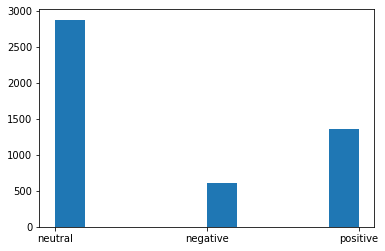

In [4]:
# Histogram of Sentiment Variable
plt.hist(data['Sentiment'])
plt.show()

In [5]:
# Pie Chart of Sentiment Variable
sentiment_counts = data['Sentiment'].value_counts()
sentiment_counts

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

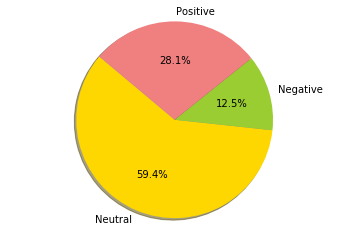

In [6]:
labels = 'Neutral', 'Negative', 'Positive'
sizes = [2879,604,1363]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [7]:
# Remove Punctuation
data['tokenized_sents'] = data['Headline'].str.replace('[{}]'.format(string.punctuation), '')
data.head()

,Sentiment,Headline,Sentiment_Numeric,tokenized_sents
0,neutral,"According to Gran , the company has no plans t...",1,According to Gran the company has no plans to...
1,neutral,Technopolis plans to develop in stages an area...,1,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...,0,The international electronic industry company ...
3,positive,With the new production plant the company woul...,2,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...,2,According to the company s updated strategy fo...


## Create Word Clouds

In [8]:
top_N = 2000
txt = data.tokenized_sents.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

In [9]:
stopwords_2 = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords_2) 

In [10]:
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

print(rslt)
print('=' * 60)

         Frequency
Word              
eur           1015
company        848
said           544
mn             515
finnish        512
...            ...
sentera          5
grid             5
96               5
powder           5
face             5

[2000 rows x 1 columns]


In [11]:
rslt.to_csv('namesDFtoCSV')

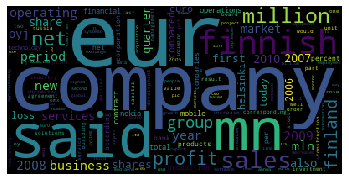

In [12]:
reader = csv.reader(open('namesDFtoCSV', 'r',newline='\n'))
next(reader)
d = {}
for k,v in reader:
    d[k] = int(v)
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(d)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [13]:
negative = data[data['Sentiment_Numeric'] == 0]
neutral = data[data['Sentiment_Numeric'] == 1]
positive = data[data['Sentiment_Numeric'] == 2]

negative_txt = negative.tokenized_sents.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
negative_words = nltk.tokenize.word_tokenize(negative_txt)
negative_word_dist = nltk.FreqDist(negative_words)
negative_words_except_stop_dist = nltk.FreqDist(w for w in negative_words if w not in stopwords_2) 

neutral_txt = neutral.tokenized_sents.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
neutral_words = nltk.tokenize.word_tokenize(neutral_txt)
neutral_word_dist = nltk.FreqDist(neutral_words)
neutral_words_except_stop_dist = nltk.FreqDist(w for w in neutral_words if w not in stopwords_2) 

positive_txt = positive.tokenized_sents.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
positive_words = nltk.tokenize.word_tokenize(positive_txt)
positive_word_dist = nltk.FreqDist(positive_words)
positive_words_except_stop_dist = nltk.FreqDist(w for w in positive_words if w not in stopwords_2) 

In [14]:
negative_rslt = pd.DataFrame(negative_word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

negative_rslt = pd.DataFrame(negative_words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

print(negative_rslt)
print('=' * 60)

            Frequency
Word                 
eur               325
mn                224
profit            156
net               104
company           100
...               ...
likely              1
altogether          1
106                 1
largely             1
refining            1

[2000 rows x 1 columns]


In [15]:
neutral_rslt = pd.DataFrame(neutral_word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

neutral_rslt = pd.DataFrame(neutral_words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

print(neutral_rslt)
print('=' * 60)

            Frequency
Word                 
company           508
eur               241
said              237
finland           219
finnish           215
...               ...
module              3
benefits            3
relatively          3
short               3
charge              3

[2000 rows x 1 columns]


In [16]:
positive_rslt = pd.DataFrame(positive_word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

positive_rslt = pd.DataFrame(positive_words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

print(positive_rslt)
print('=' * 60)

            Frequency
Word                 
eur               449
mn                241
company           240
said              230
finnish           198
...               ...
upon                2
newly               2
contact             2
vice                2
nonbinding          2

[2000 rows x 1 columns]


In [17]:
negative_rslt.to_csv('negative_rslt')
neutral_rslt.to_csv('neutral_rslt')
positive_rslt.to_csv('positive_rslt')

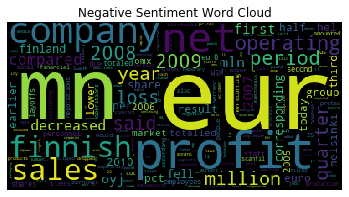

In [18]:
reader = csv.reader(open('negative_rslt', 'r',newline='\n'))
next(reader)
d = {}
for k,v in reader:
    d[k] = int(v)
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(d)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Negative Sentiment Word Cloud')
plt.show()

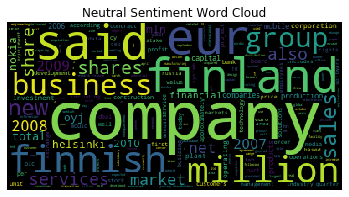

In [19]:
reader = csv.reader(open('neutral_rslt', 'r',newline='\n'))
next(reader)
d = {}
for k,v in reader:
    d[k] = int(v)
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(d)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Neutral Sentiment Word Cloud')
plt.show()

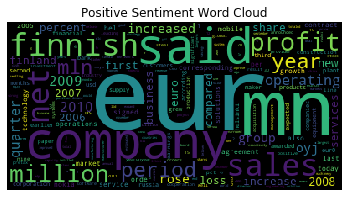

In [20]:
reader = csv.reader(open('positive_rslt', 'r',newline='\n'))
next(reader)
d = {}
for k,v in reader:
    d[k] = int(v)
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(d)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Positive Sentiment Word Cloud')
plt.show()

In [21]:
# Tokenize Sentences
data['tokenized_sents'] = data.apply(lambda row: nltk.word_tokenize(row['tokenized_sents']), axis=1)
data.head()

,Sentiment,Headline,Sentiment_Numeric,tokenized_sents
0,neutral,"According to Gran , the company has no plans t...",1,"[According, to, Gran, the, company, has, no, p..."
1,neutral,Technopolis plans to develop in stages an area...,1,"[Technopolis, plans, to, develop, in, stages, ..."
2,negative,The international electronic industry company ...,0,"[The, international, electronic, industry, com..."
3,positive,With the new production plant the company woul...,2,"[With, the, new, production, plant, the, compa..."
4,positive,According to the company 's updated strategy f...,2,"[According, to, the, company, s, updated, stra..."


In [22]:
# Remove StopWords
stop_words = set(stopwords.words('english'))
#stop_words.update(punctuation)
data['tokenized_sents'] = data['tokenized_sents'].apply(lambda row: [item for item in row if item not in stop_words])
data.head()

,Sentiment,Headline,Sentiment_Numeric,tokenized_sents
0,neutral,"According to Gran , the company has no plans t...",1,"[According, Gran, company, plans, move, produc..."
1,neutral,Technopolis plans to develop in stages an area...,1,"[Technopolis, plans, develop, stages, area, le..."
2,negative,The international electronic industry company ...,0,"[The, international, electronic, industry, com..."
3,positive,With the new production plant the company woul...,2,"[With, new, production, plant, company, would,..."
4,positive,According to the company 's updated strategy f...,2,"[According, company, updated, strategy, years,..."


In [23]:
# Create Training and Test Datasets
X_train,X_test,y_train,y_test = train_test_split(data['tokenized_sents'],data['Sentiment_Numeric'],test_size = 0.2 , random_state = 0)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [24]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False, ngram_range=(1,2), 
                             max_df=0.9, min_df=0, max_features=4000)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(3876, 4000) (970, 4000)


### Linear SVM

In [25]:
# Create model
LinearSVM_model = LinearSVC()
LinearSVM_model.fit(train_vectors, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [26]:
# Training Score
LinearSVM_model.score(train_vectors, y_train)

0.9734262125902993

In [27]:
# Test SVM model
predicted = LinearSVM_model.predict(test_vectors)
print("Accuracy Score")
print(accuracy_score(y_test,predicted))

Accuracy Score
0.7474226804123711


# Ensemble Models

In [28]:
# Random Forest
estimators = 10
rf = RandomForestClassifier(n_estimators=estimators)
rf.fit(train_vectors, y_train)
rf_score_test = rf.score(test_vectors,y_test)
rf_score_train = rf.score(train_vectors,y_train)
print("Number of Decision Trees: " + str(estimators))
print("Test Score: " + str(rf_score_test))
print("Train Score: " + str(rf_score_train))

Number of Decision Trees: 10
Test Score: 0.7061855670103093
Train Score: 0.9819401444788441


In [29]:
# Random Forest
estimators = 25
rf = RandomForestClassifier(n_estimators=estimators)
rf.fit(train_vectors, y_train)
rf_score_test = rf.score(test_vectors,y_test)
rf_score_train = rf.score(train_vectors,y_train)
print("Number of Decision Trees: " + str(estimators))
print("Test Score: " + str(rf_score_test))
print("Train Score: " + str(rf_score_train))

Number of Decision Trees: 25
Test Score: 0.7298969072164948
Train Score: 0.9971620227038184


In [30]:
# Random Forest
estimators = 50
rf = RandomForestClassifier(n_estimators=estimators)
rf.fit(train_vectors, y_train)
rf_score_test = rf.score(test_vectors,y_test)
rf_score_train = rf.score(train_vectors,y_train)
print("Number of Decision Trees: " + str(estimators))
print("Test Score: " + str(rf_score_test))
print("Train Score: " + str(rf_score_train))

Number of Decision Trees: 50
Test Score: 0.7350515463917526
Train Score: 0.9992260061919505


In [31]:
# Bagging
max_samples = 0.5
max_features = 1.0
n_estimators = 20

bg = BaggingClassifier(DecisionTreeClassifier(), max_samples = max_samples, 
                           max_features = max_features, n_estimators = n_estimators)
bg.fit(train_vectors, y_train)
bg_test_score = bg.score(test_vectors, y_test)
bg_train_score = bg.score(train_vectors, y_train)
print("Max Samples: " + str(max_samples))
print("Max Features: " + str(max_features))
print("Number of Decision Trees: " + str(n_estimators))
print("Test Score: " + str(bg_test_score))
print("Train Score: " + str(bg_train_score))

Max Samples: 0.5
Max Features: 1.0
Number of Decision Trees: 20
Test Score: 0.7175257731958763
Train Score: 0.9130546955624355


In [32]:
# Bagging - ComplementNB
bg = BaggingClassifier(ComplementNB())
bg.fit(train_vectors, y_train)
bg_test_score = bg.score(test_vectors, y_test)
bg_train_score = bg.score(train_vectors, y_train)
print("Test Score: " + str(bg_test_score))
print("Train Score: " + str(bg_train_score))

Test Score: 0.7257731958762886
Train Score: 0.8433952528379773


In [33]:
# Boosting
adb = AdaBoostClassifier(ComplementNB(), algorithm='SAMME')
adb.fit(train_vectors, y_train)
adb_test_score = adb.score(test_vectors, y_test)
adb_train_score = adb.score(train_vectors, y_train)
print("Test Score: "+ str(adb_test_score))
print("Train Score: " + str(adb_train_score))

Test Score: 0.711340206185567
Train Score: 0.8175954592363261


### SVM

In [34]:
# Create Model
SVM_model = SVC()
SVM_model.fit(train_vectors, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
# Training Score
SVM_model.score(train_vectors, y_train)

0.9589783281733746

In [36]:
# Test SVM model
predicted = SVM_model.predict(test_vectors)
print("Accuracy Score")
print(accuracy_score(y_test,predicted))

Accuracy Score
0.7309278350515463


In [37]:
# Grid Search to test for best parameters
param = {'C': [8,9,10,11,12]}
grid_SVM = GridSearchCV(SVC(), param, cv=5, n_jobs=-1)
grid_SVM.fit(train_vectors, y_train)

print(grid_SVM.best_params_)
print(grid_SVM.best_score_)

{'C': 8}
0.7340059860325907


In [38]:
# Test model
prediction = grid_SVM.predict(test_vectors)
print("Accuracy Score")
print(accuracy_score(y_test,prediction))

Accuracy Score
0.7505154639175258


### Complement Naive Bayes

In [39]:
# Create model
CNB_model = ComplementNB()
CNB_model.fit(train_vectors, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [40]:
# Training Score
CNB_model.score(train_vectors, y_train)

0.847265221878225

In [41]:
# Test Naive Bayes model
predicted = CNB_model.predict(test_vectors)
print("Accuracy Score")
print(accuracy_score(y_test,predicted))

Accuracy Score
0.734020618556701


In [42]:
# Test Parameters
param = {'norm': [True, False]}
grid_CNB = GridSearchCV(ComplementNB(alpha = 10), param, cv=5, n_jobs=-1)
grid_CNB.fit(train_vectors, y_train)

print(grid_CNB.best_params_)
print(grid_CNB.best_score_)

{'norm': True}
0.6909205187894911


In [43]:
#Test Model
prediction = grid_CNB.predict(test_vectors)
print("Accuracy Score")
print(accuracy_score(y_test,prediction))

Accuracy Score
0.7144329896907217


# Naive Bayes

In [44]:
# Train Naive Bayes model
NB_model = MultinomialNB().fit(train_vectors, y_train)

In [45]:
# Training Score
NB_model.score(train_vectors, y_train)

0.7757997936016512

In [46]:
# Test Naive Bayes model
predicted = NB_model.predict(test_vectors)
print("Accuracy Score")
print(accuracy_score(y_test,predicted))

Accuracy Score
0.7103092783505155


In [47]:
# Test Parameters
param = {'alpha': [0.1, 1, 10]}
grid_NB = GridSearchCV(MultinomialNB(), param, cv=5, n_jobs=-1)
grid_NB.fit(train_vectors, y_train)

print(grid_NB.best_params_)
print(grid_NB.best_score_)

{'alpha': 0.1}
0.7074289990023279


In [48]:
# Test model
prediction = grid_NB.predict(test_vectors)
print("Accuracy Score")
print(accuracy_score(y_test,prediction))

Accuracy Score
0.7216494845360825


# Logistic Regression

In [49]:
# Train Logistic Regression model
LR_model = LogisticRegression().fit(train_vectors, y_train)

In [50]:
# Training Score
LR_model.score(train_vectors, y_train)

0.8552631578947368

In [51]:
# Test Logistic Regression model
predicted = LR_model.predict(test_vectors)
print("Accuracy Score")
print(accuracy_score(y_test,predicted))

Accuracy Score
0.7494845360824742


In [52]:
# Test parameters
param = {'C': [0.1, 1, 10]}
grid_LR = GridSearchCV(LogisticRegression(), param, cv=5, n_jobs=-1)
grid_LR.fit(train_vectors, y_train)

print(grid_LR.best_params_)
print(grid_LR.best_score_)

{'C': 10}
0.7332321250415696


/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
# Test Model
prediction = grid_LR.predict(test_vectors)
print("Accuracy Score")
print(accuracy_score(y_test,prediction))

Accuracy Score
0.7525773195876289


### KNN

In [54]:
# Create model
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(train_vectors, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
# Training Score
KNN_model.score(train_vectors, y_train)

0.641640866873065

In [56]:
# Test model
y_pred = KNN_model.predict(test_vectors)
print("Accuracy Score")
print(accuracy_score(y_test,y_pred))

Accuracy Score
0.6268041237113402


In [57]:
# Test parameters
param = {'n_neighbors': [3,5,7,41,53,55,57,59,61]}
grid_KNN = GridSearchCV(KNeighborsClassifier(), param, cv=5, n_jobs=-1)
grid_KNN.fit(train_vectors, y_train)

print(grid_KNN.best_params_)
print(grid_KNN.best_score_)

{'n_neighbors': 41}
0.6646055869637513


In [58]:
# Test model
prediction = grid_KNN.predict(test_vectors)
print("Accuracy Score")
print(accuracy_score(y_test,prediction))

Accuracy Score
0.6783505154639176


### Neural Network

In [59]:
# Create multilayer perceptron neural network
mlpc_model = MLPClassifier(hidden_layer_sizes=(25,25,25), max_iter=100)
mlpc_model.fit(train_vectors, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(25, 25, 25), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [60]:
# Training Score
mlpc_model.score(train_vectors, y_train)

0.9997420020639834

In [61]:
# Test Neural Network
pred_mlpc = mlpc_model.predict(test_vectors)

In [62]:
#print("Accuracy Score")
print(accuracy_score(y_test,pred_mlpc))

0.722680412371134


## Final Model

In [63]:
# Train LR Model
LR_model = LogisticRegression(C=10).fit(train_vectors, y_train)

/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [64]:
# Training Score
LR_model.score(train_vectors, y_train)

0.9917440660474717

In [65]:
# Test Logistic Regression model
predicted = LR_model.predict(test_vectors)
print("Accuracy Score")
print(accuracy_score(y_test,predicted))

Accuracy Score
0.7525773195876289


# NYT Data

In [66]:
# Import NYT Data
Jan2020_NYT_data = pd.read_csv('NYT_headline_data_012020.csv')
Feb2020_NYT_data = pd.read_csv('NYT_headline_data_022020.csv')
Mar2020_NYT_data = pd.read_csv('NYT_headline_data_032020.csv')
Apr2020_NYT_data = pd.read_csv('NYT_headline_data_042020.csv')

In [67]:
# Remove Punctuation
Jan2020_NYT_data['headline'] = Jan2020_NYT_data['0'].str.replace('[{}]'.format(string.punctuation), '')
Feb2020_NYT_data['headline'] = Feb2020_NYT_data['0'].str.replace('[{}]'.format(string.punctuation), '')
Mar2020_NYT_data['headline'] = Mar2020_NYT_data['0'].str.replace('[{}]'.format(string.punctuation), '')
Apr2020_NYT_data['headline'] = Apr2020_NYT_data['0'].str.replace('[{}]'.format(string.punctuation), '')

In [68]:
# Tokenize Sentences
Jan2020_NYT_data['headline'] = Jan2020_NYT_data.apply(lambda row: nltk.word_tokenize(row['headline']), axis=1)
Feb2020_NYT_data['headline'] = Feb2020_NYT_data.apply(lambda row: nltk.word_tokenize(row['headline']), axis=1)
Mar2020_NYT_data['headline'] = Mar2020_NYT_data.apply(lambda row: nltk.word_tokenize(row['headline']), axis=1)
Apr2020_NYT_data['headline'] = Apr2020_NYT_data.apply(lambda row: nltk.word_tokenize(row['headline']), axis=1)

In [69]:
# Remove StopWords
stop_words = set(stopwords.words('english'))
Jan2020_NYT_data['headline'] = Jan2020_NYT_data['headline'].apply(lambda row: [item for item in row if item not in stop_words])
Feb2020_NYT_data['headline'] = Feb2020_NYT_data['headline'].apply(lambda row: [item for item in row if item not in stop_words])
Mar2020_NYT_data['headline'] = Mar2020_NYT_data['headline'].apply(lambda row: [item for item in row if item not in stop_words])
Apr2020_NYT_data['headline'] = Apr2020_NYT_data['headline'].apply(lambda row: [item for item in row if item not in stop_words])

### January 2020 Predictions

In [70]:
# TF-IDF Vectorizer
X_NYT_Jan2020 = Jan2020_NYT_data['headline'].values
Jan2020_NYT_vectors = vectorizer.transform(X_NYT_Jan2020)

In [71]:
# Run Naive Bayes Model on NYT Headlines
Jan2020_NYT_predicted = LR_model.predict(Jan2020_NYT_vectors)

In [72]:
Jan2020_NYT_predicted

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### February 2020 Predictions

In [73]:
# TF-IDF Vectorizer
X_NYT_Feb2020 = Feb2020_NYT_data['headline'].values
Feb2020_NYT_vectors = vectorizer.transform(X_NYT_Feb2020)

In [74]:
# Run Naive Bayes Model on NYT Headlines
Feb2020_NYT_predicted = LR_model.predict(Feb2020_NYT_vectors)

In [75]:
Feb2020_NYT_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,

### March 2020 Predictions

In [76]:
# TF-IDF Vectorizer
X_NYT_Mar2020 = Mar2020_NYT_data['headline'].values
Mar2020_NYT_vectors = vectorizer.transform(X_NYT_Mar2020)

In [77]:
# Run Naive Bayes Model on NYT Headlines
Mar2020_NYT_predicted = LR_model.predict(Mar2020_NYT_vectors)

In [78]:
Mar2020_NYT_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### April 2020 Predictions

In [79]:
# TF-IDF Vectorizer
X_NYT_Apr2020 = Apr2020_NYT_data['headline'].values
Apr2020_NYT_vectors = vectorizer.transform(X_NYT_Apr2020)

In [80]:
# Run Naive Bayes Model on NYT Headlines
Apr2020_NYT_predicted = LR_model.predict(Apr2020_NYT_vectors)

In [81]:
Apr2020_NYT_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

### January 2020 Sentiment Analysis

In [82]:
Jan2020Sentiment = pd.DataFrame({'Prediction': Jan2020_NYT_predicted})
Jan2020Sentiment.head()

,Prediction
0,2
1,1
2,1
3,1
4,1


In [83]:
# Function to convert numbers to sentiment label
def label_sentiment (row):
    if row['Prediction'] == 0 :
      return 'Negative'
    if row['Prediction'] == 1 :
      return 'Neutral'
    if row['Prediction'] == 2 :
      return 'Positive'
    return 'Other'

In [84]:
Jan2020Sentiment['Sentiment'] = Jan2020Sentiment.apply (lambda row: label_sentiment(row), axis=1)

In [85]:
Jan2020Sentiment.head()

,Prediction,Sentiment
0,2,Positive
1,1,Neutral
2,1,Neutral
3,1,Neutral
4,1,Neutral


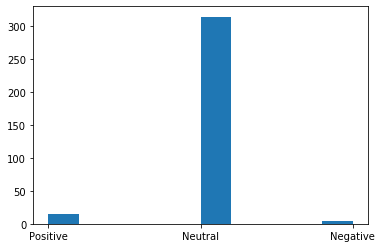

In [86]:
plt.hist(Jan2020Sentiment['Sentiment'])
plt.show()

In [87]:
Jan2020_sentiment_counts = Jan2020Sentiment['Sentiment'].value_counts()
Jan2020_sentiment_counts

Neutral     314
Positive     15
Negative      4
Name: Sentiment, dtype: int64

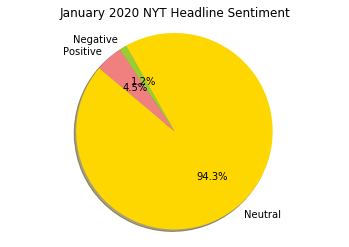

In [88]:
labels = 'Neutral', 'Negative', 'Positive'
sizes = [314,4,15]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('January 2020 NYT Headline Sentiment')
plt.show()

### February 2020 Sentiment Analysis

In [89]:
Feb2020Sentiment = pd.DataFrame({'Prediction': Feb2020_NYT_predicted})
Feb2020Sentiment.head()

,Prediction
0,1
1,1
2,1
3,1
4,1


In [90]:
Feb2020Sentiment['Sentiment'] = Feb2020Sentiment.apply (lambda row: label_sentiment(row), axis=1)
Feb2020Sentiment.head()

,Prediction,Sentiment
0,1,Neutral
1,1,Neutral
2,1,Neutral
3,1,Neutral
4,1,Neutral


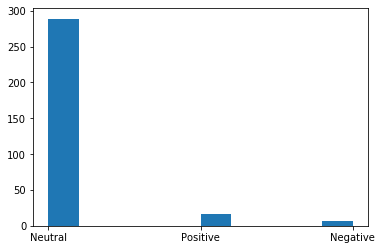

In [91]:
plt.hist(Feb2020Sentiment['Sentiment'])
plt.show()

In [92]:
Feb2020_sentiment_counts = Feb2020Sentiment['Sentiment'].value_counts()
Feb2020_sentiment_counts

Neutral     289
Positive     17
Negative      7
Name: Sentiment, dtype: int64

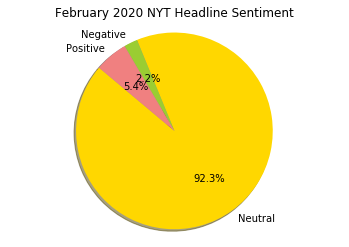

In [93]:
labels = 'Neutral', 'Negative', 'Positive'
sizes = [289,7,17]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('February 2020 NYT Headline Sentiment')
plt.show()

### March 2020 Sentiment Analysis

In [94]:
Mar2020Sentiment = pd.DataFrame({'Prediction': Mar2020_NYT_predicted})
Mar2020Sentiment.head()

,Prediction
0,1
1,1
2,1
3,1
4,1


In [95]:
Mar2020Sentiment['Sentiment'] = Mar2020Sentiment.apply (lambda row: label_sentiment(row), axis=1)
Mar2020Sentiment.head()

,Prediction,Sentiment
0,1,Neutral
1,1,Neutral
2,1,Neutral
3,1,Neutral
4,1,Neutral


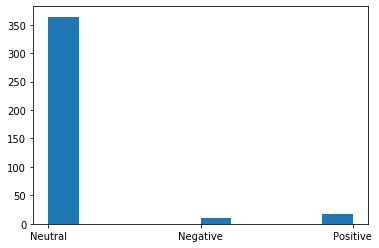

In [96]:
plt.hist(Mar2020Sentiment['Sentiment'])
plt.show()

In [97]:
Mar2020_sentiment_counts = Mar2020Sentiment['Sentiment'].value_counts()
Mar2020_sentiment_counts

Neutral     364
Positive     18
Negative     11
Name: Sentiment, dtype: int64

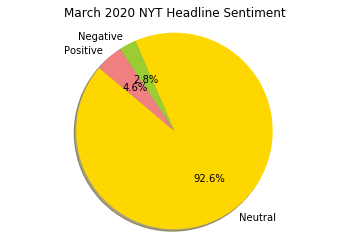

In [98]:
labels = 'Neutral', 'Negative', 'Positive'
sizes = [364,11,18]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('March 2020 NYT Headline Sentiment')
plt.show()

### April 2020 Sentiment Analysis

In [99]:
Apr2020Sentiment = pd.DataFrame({'Prediction': Apr2020_NYT_predicted})
Apr2020Sentiment.head()

,Prediction
0,1
1,1
2,1
3,1
4,1


In [100]:
Apr2020Sentiment['Sentiment'] = Apr2020Sentiment.apply (lambda row: label_sentiment(row), axis=1)
Apr2020Sentiment.head()

,Prediction,Sentiment
0,1,Neutral
1,1,Neutral
2,1,Neutral
3,1,Neutral
4,1,Neutral


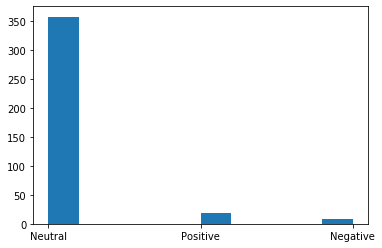

In [101]:
plt.hist(Apr2020Sentiment['Sentiment'])
plt.show()

In [102]:
Apr2020_sentiment_counts = Apr2020Sentiment['Sentiment'].value_counts()
Apr2020_sentiment_counts

Neutral     357
Positive     18
Negative      9
Name: Sentiment, dtype: int64

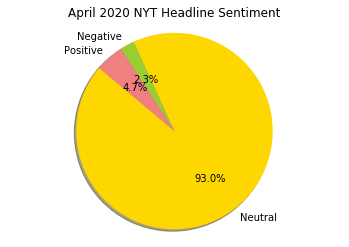

In [103]:
labels = 'Neutral', 'Negative', 'Positive'
sizes = [357,9,18]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('April 2020 NYT Headline Sentiment')
plt.show()

In [104]:
nyt_sent_counts = pd.DataFrame(np.array([[4, 314, 15, 1.2, 94.3, 4.5], 
                                         [7, 289, 17, 2.2, 92.3, 5.4], 
                                         [11, 364, 18, 2.8, 92.6, 4.6], 
                                         [9, 357, 18, 2.3, 93, 4.7]]),
                   columns=['Negative', 'Neutral', 'Positive', 'Negative %', 'Neutral %', 'Positive %'], 
                    index=['January 2020', 'February 2020', 'March 2020', 'April 2020'])

In [105]:
nyt_sent_counts

,Negative,Neutral,Positive,Negative %,Neutral %,Positive %
January 2020,4.0,314.0,15.0,1.2,94.3,4.5
February 2020,7.0,289.0,17.0,2.2,92.3,5.4
March 2020,11.0,364.0,18.0,2.8,92.6,4.6
April 2020,9.0,357.0,18.0,2.3,93.0,4.7


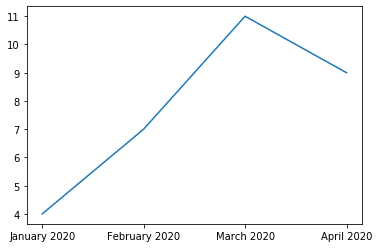

In [106]:
plt.plot(nyt_sent_counts['Negative'])

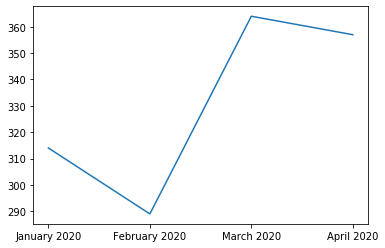

In [107]:
plt.plot(nyt_sent_counts['Neutral'])

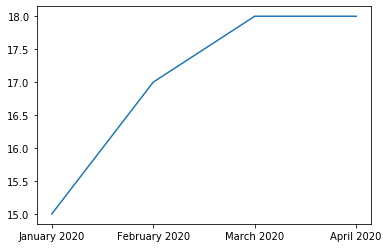

In [108]:
plt.plot(nyt_sent_counts['Positive'])

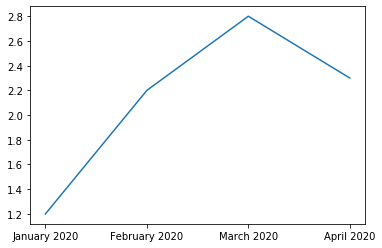

In [109]:
plt.plot(nyt_sent_counts['Negative %'])

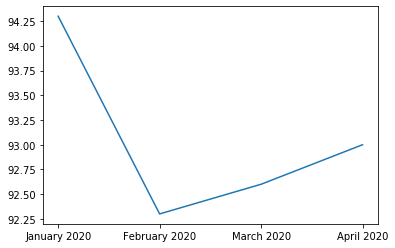

In [110]:
plt.plot(nyt_sent_counts['Neutral %'])

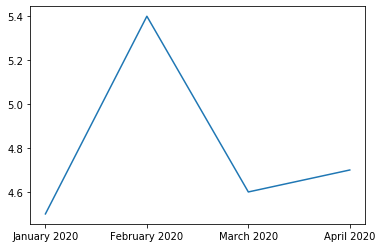

In [111]:
plt.plot(nyt_sent_counts['Positive %'])

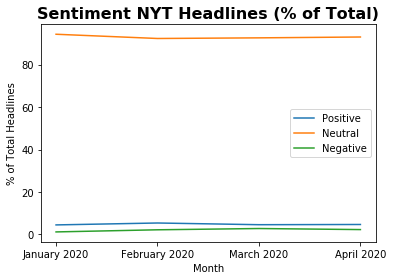

In [112]:
Positive_Percentage = nyt_sent_counts['Positive %']
Neutral_Percentage = nyt_sent_counts['Neutral %']
Negative_Percentage = nyt_sent_counts['Negative %']
plt.plot(Positive_Percentage, label = 'Positive')
plt.plot(Neutral_Percentage, label = 'Neutral')
plt.plot(Negative_Percentage, label = 'Negative')
plt.legend()
plt.xlabel("Month")
plt.ylabel("% of Total Headlines")
plt.title("Sentiment NYT Headlines (% of Total)", fontsize=16 , fontweight='bold')
plt.show()

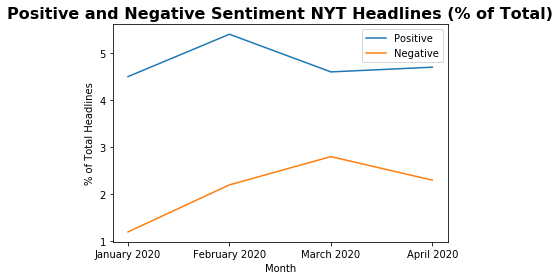

In [113]:
plt.plot(Positive_Percentage, label = 'Positive')
plt.plot(Negative_Percentage, label = 'Negative')
plt.legend()
plt.xlabel("Month")
plt.ylabel("% of Total Headlines")
plt.title("Positive and Negative Sentiment NYT Headlines (% of Total)", fontsize=16, fontweight='bold')
plt.show()